In [1]:
import matplotlib.pyplot as plt
import numpy as np, pickle, cv2
import glob, os
from scipy import stats

from subject import Subject
from fixation import FixationAnalyzer

root = "/home/kavra/Datasets/medical/cvi_eyetracking/asc_data_v1/"
trial = "Freeviewingstillimage_1.jpg"

In [41]:
sub0 = Subject(root, "2004_1")
data0, fr0 = sub0.extract_data(trial, vel=False)
out = sub0.extract_saccades(trial_name=trial)

In [3]:
fix_analyzer = FixationAnalyzer(root, out)
a = fix_analyzer.fixation_map(trial)

In [33]:
ids = [i for i in os.listdir(root) if i.endswith('.asc')]
ctrl_ids = [i.split(".")[0] for i in ids if i.split('_')[0].startswith("2")]
cvi_ids = [i.split(".")[0] for i in ids if i not in ctrl_ids]

durations_ctrl = []
for subject in ctrl_ids:
    sub = Subject(root, subject)
    out = sub.extract_fixations(trial_name=trial)
    fix_analyzer = FixationAnalyzer(root, out)
    dur = fix_analyzer.number_of_fixations()
    durations_ctrl.append(dur)

durations_cvi = []
for subject in cvi_ids:
    sub = Subject(root, subject)
    out = sub.extract_fixations(trial_name=trial)
    fix_analyzer = FixationAnalyzer(root, out)
    dur = fix_analyzer.number_of_fixations()
    durations_cvi.append(dur)

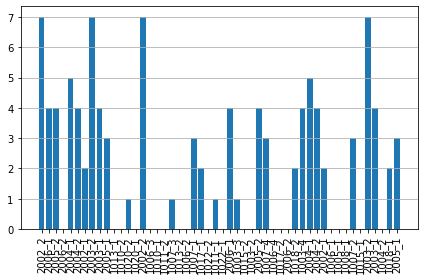

In [34]:
names = ctrl_ids + cvi_ids
t = list(range(len(names)))

plt.bar(t, durations_ctrl + durations_cvi)
plt.xticks(t, names, rotation=90)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

In [35]:
from scipy.stats import ttest_ind

print(np.mean(durations_cvi), np.mean(durations_ctrl))

stat, p_value = ttest_ind(durations_ctrl, durations_cvi)
print(p_value)

1.575 4.0
0.0015258557743406044


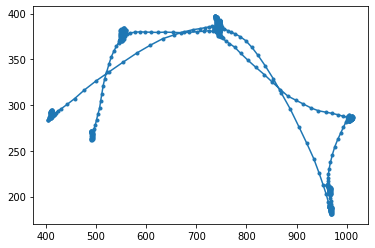

In [43]:
plt.plot(data0[:, 0], data0[:, 1], marker=".");

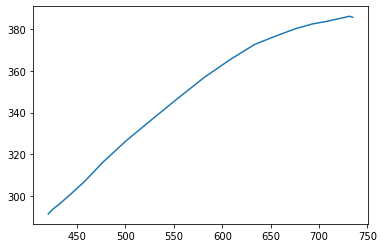

In [42]:
plt.plot(out[0]["data"][:, 0], out[0]["data"][:, 1]);

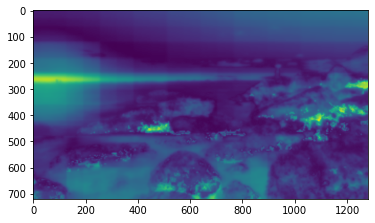

In [40]:
smap = np.load(os.path.join("output/extra", "saliency_maps", trial[:-4], trial[:-4] + "_color.npy"))
smap = (smap - np.min(smap))/(np.max(smap) - np.min(smap))
plt.imshow(smap);

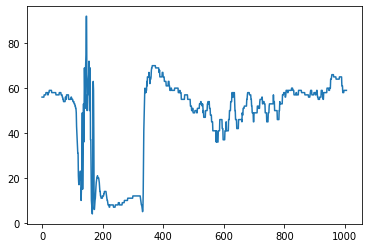

In [7]:
strace = SaliencyTrace(root, smaps=["color", "0"])
sal_track = strace.computeTraces(trial, data0)
plt.plot(sal_track["color"]);

In [ ]:
# TODO: make plot for average fixations
# Perform Mann-Whitney test on CVI - ctrl
# Do the same for average saccades